# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

577

In [3]:
cities

['margate',
 'ilulissat',
 'butaritari',
 'punta arenas',
 'mataura',
 'karratha',
 'rikitea',
 'leningradskiy',
 'karlskoga',
 'lompoc',
 'ust-tarka',
 'ushuaia',
 'bethanien',
 'asau',
 'dafeng',
 'kjollefjord',
 'talnakh',
 'wenzhou',
 'busselton',
 'khatanga',
 'thompson',
 'bathsheba',
 'saint-philippe',
 'atuona',
 'mahebourg',
 'hobart',
 'lorengau',
 'kilkis',
 'port alfred',
 'ahuimanu',
 'puerto ayora',
 'amderma',
 'tabiauea',
 'prince rupert',
 'ribeira grande',
 'jacqueville',
 'dahra',
 'yumen',
 'narsaq',
 'kahului',
 'bredasdorp',
 'tuktoyaktuk',
 'yellowknife',
 'chokurdakh',
 'talcahuano',
 'te anau',
 'colares',
 'knysna',
 'bluff',
 'taolanaro',
 'altay',
 'lagos',
 'unai',
 'kalabo',
 'clyde river',
 'sitka',
 'samusu',
 'seoul',
 'jamestown',
 'lampa',
 'new norfolk',
 'kolpashevo',
 'abong mbang',
 'maghama',
 'necochea',
 'avarua',
 'praia',
 'cooma',
 'katsuura',
 'itarema',
 'paoua',
 'fairbanks',
 'aklavik',
 'nikolskoye',
 'hermanus',
 'henties bay',
 'georg

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# set base url, units for query url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="


# create list to store called data
city_id_list = []
city_name_list = []
country_list = []
lng_list = []
lat_list = []
temp_list = []
humidity_list = []
clouds_list = []
wind_speed_list = []

# loop through cities
# creating record counter
i = 1
for city in cities:
    
    # get weather data for cities
    response_json = requests.get(query_url + city).json()
    
    # set up error handling and print of list  
    try:
        
        city_id = response_json['id']
        city_id_list.append(city_id)   
        city_name = response_json['name']
        city_name_list.append(city_name)
        country_name = response_json['sys']['country']
        country_list.append(country_name)
        lng = response_json['coord']['lon']
        lng_list.append(lng)
        lat = response_json['coord']['lat']
        lat_list.append(lat)
        temp = response_json['main']['temp']
        temp_list.append(temp)
        humidity = response_json['main']['humidity']
        humidity_list.append(humidity)
        clouds = response_json['clouds']['all']
        clouds_list.append(clouds)
        wind_speed = response_json['wind']['speed']
        wind_speed_list.append(wind_speed)
    
        print(f"processing record {i}|City Name: {city}, City ID: {city_id}")
        i += 1
    
    # print exception for cities with no data
    except:
        
        print("No record of city requested, moving to next city")

processing record 1|City Name: margate, City ID: 2643044
processing record 2|City Name: ilulissat, City ID: 3423146
processing record 3|City Name: butaritari, City ID: 2110227
processing record 4|City Name: punta arenas, City ID: 3874787
processing record 5|City Name: mataura, City ID: 6201424
processing record 6|City Name: karratha, City ID: 6620339
processing record 7|City Name: rikitea, City ID: 4030556
processing record 8|City Name: leningradskiy, City ID: 2123814
processing record 9|City Name: karlskoga, City ID: 2701715
processing record 10|City Name: lompoc, City ID: 5367788
processing record 11|City Name: ust-tarka, City ID: 1488074
processing record 12|City Name: ushuaia, City ID: 3833367
processing record 13|City Name: bethanien, City ID: 3358416
processing record 14|City Name: asau, City ID: 686090
processing record 15|City Name: dafeng, City ID: 1814435
processing record 16|City Name: kjollefjord, City ID: 779261
processing record 17|City Name: talnakh, City ID: 1490256
pro

processing record 131|City Name: maragogi, City ID: 3395458
No record of city requested, moving to next city
processing record 132|City Name: najran, City ID: 103630
processing record 133|City Name: fortuna, City ID: 5563839
processing record 134|City Name: awbari, City ID: 2219235
processing record 135|City Name: oktyabrskiy, City ID: 515879
processing record 136|City Name: mustasaari, City ID: 651299
processing record 137|City Name: lata, City ID: 2738381
No record of city requested, moving to next city
No record of city requested, moving to next city
processing record 138|City Name: cidreira, City ID: 3466165
processing record 139|City Name: sangueya, City ID: 2416061
processing record 140|City Name: lolodorf, City ID: 2229267
No record of city requested, moving to next city
processing record 141|City Name: ancud, City ID: 3899695
processing record 142|City Name: victoria, City ID: 1819729
processing record 143|City Name: ludvika, City ID: 2693759
processing record 144|City Name: ch

processing record 258|City Name: puerto del rosario, City ID: 2512186
processing record 259|City Name: shestakovo, City ID: 2016733
processing record 260|City Name: krasnoyarka, City ID: 1502041
No record of city requested, moving to next city
processing record 261|City Name: klaksvik, City ID: 2618795
processing record 262|City Name: nanortalik, City ID: 3421765
processing record 263|City Name: veydelevka, City ID: 473856
processing record 264|City Name: husavik, City ID: 2629833
processing record 265|City Name: andros town, City ID: 3572906
processing record 266|City Name: waitara, City ID: 2208091
No record of city requested, moving to next city
processing record 267|City Name: notre-dame-du-lac, City ID: 6944109
processing record 268|City Name: takoradi, City ID: 2294915
processing record 269|City Name: torbay, City ID: 6167817
processing record 270|City Name: grindavik, City ID: 3416888
processing record 271|City Name: marsaxlokk, City ID: 2562247
processing record 272|City Name: 

processing record 385|City Name: santa maria, City ID: 3450083
processing record 386|City Name: tobolsk, City ID: 1489530
processing record 387|City Name: banugao, City ID: 1727111
processing record 388|City Name: aquiraz, City ID: 3407407
processing record 389|City Name: lima, City ID: 3936456
processing record 390|City Name: kismayo, City ID: 55671
processing record 391|City Name: pangnirtung, City ID: 6096551
processing record 392|City Name: leshukonskoye, City ID: 535839
processing record 393|City Name: mutoko, City ID: 884927
No record of city requested, moving to next city
processing record 394|City Name: san carlos de bariloche, City ID: 7647007
processing record 395|City Name: lonavale, City ID: 1264793
processing record 396|City Name: krasnovishersk, City ID: 542184
processing record 397|City Name: murree, City ID: 1169684
processing record 398|City Name: vardo, City ID: 777019
processing record 399|City Name: auki, City ID: 2109701
processing record 400|City Name: jalu, City 

processing record 513|City Name: kungurtug, City ID: 1501377
processing record 514|City Name: el porvenir, City ID: 3610693
processing record 515|City Name: grand gaube, City ID: 934479
processing record 516|City Name: tolbazy, City ID: 482432
processing record 517|City Name: storforshei, City ID: 3145614
processing record 518|City Name: swan hill, City ID: 2147756
processing record 519|City Name: fasa, City ID: 134721
processing record 520|City Name: dinar, City ID: 316634
processing record 521|City Name: osa, City ID: 514706
processing record 522|City Name: taltal, City ID: 3870243
No record of city requested, moving to next city
processing record 523|City Name: weligama, City ID: 1223738
processing record 524|City Name: oyama, City ID: 1853483
processing record 525|City Name: aasiaat, City ID: 3424901
processing record 526|City Name: sanandaj, City ID: 117574
processing record 527|City Name: fairfield, City ID: 4834162
processing record 528|City Name: moindou, City ID: 2140466
proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
# convert data into a dataframe
cities_df = pd.DataFrame({"City ID": city_id_list, "City": city_name_list, "Country": country_list, "Lat": lat_list, "Lng": lng_list,
                         "Temperature": temp_list, "Humidity": humidity_list, "Clouds": clouds_list,
                         "Wind Speed": wind_speed_list})
cities_df.head()

,City ID,City,Country,Lat,Lng,Temperature,Humidity,Clouds,Wind Speed
0,2643044,Margate,GB,51.3813,1.3862,53.24,84,100,5.99
1,3423146,Ilulissat,GL,69.2167,-51.1000,3.22,51,20,4.61
2,2110227,Butaritari,KI,3.0707,172.7902,82.27,75,46,15.14
3,3874787,Punta Arenas,CL,-53.1500,-70.9167,46.51,76,0,8.05
4,6201424,Mataura,NZ,-46.1927,168.8643,47.34,100,100,1.83


In [10]:
# export to .csv file
cities_df.to_csv("output_data/city_weather.csv", index=False, header=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [17]:
humidity_check = pd.read_csv("output_data/city_weather.csv")
pd.options.display.max_rows = 999
humidity_check.head(999)

,City ID,City,Country,Lat,Lng,Temperature,Humidity,Clouds,Wind Speed
0,2643044,Margate,GB,51.3813,1.3862,53.24,84,100,5.99
1,3423146,Ilulissat,GL,69.2167,-51.1000,3.22,51,20,4.61
2,2110227,Butaritari,KI,3.0707,172.7902,82.27,75,46,15.14
3,3874787,Punta Arenas,CL,-53.1500,-70.9167,46.51,76,0,8.05
4,6201424,Mataura,NZ,-46.1927,168.8643,47.34,100,100,1.83
5,6620339,Karratha,AU,-20.7377,116.8463,79.50,43,14,9.93
6,4030556,Rikitea,PF,-23.1203,-134.9692,72.64,71,73,6.53
7,2123814,Leningradskiy,RU,69.3833,178.4167,10.74,92,98,3.42
8,2701715,Karlskoga,SE,59.3267,14.5239,37.17,88,100,5.84
9,5367788,Lompoc,US,34.6391,-120.4579,55.26,85,1,5.75


In [ ]:
#  Get the indices of cities that have humidity over 100%.
# no data available to do check

In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
# no data available to do check

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

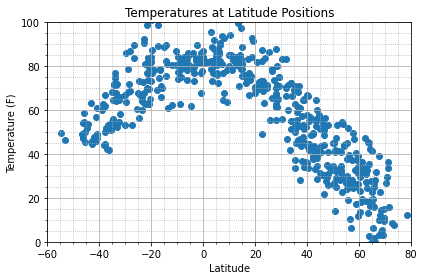

FileNotFoundError: [Errno 2] No such file or directory: 'Images/lat_temp.png'

<Figure size 432x288 with 0 Axes>

In [18]:
x_values = cities_df["Lat"]
y_values = cities_df["Temperature"]

plt.scatter(x_values,y_values)
plt.title('Temperatures at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.ylim(0, 100)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Images/lat_temp.png")

## Latitude vs. Humidity Plot

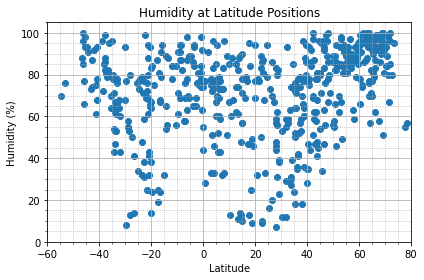

FileNotFoundError: [Errno 2] No such file or directory: 'Images/lat_humid.png'

<Figure size 432x288 with 0 Axes>

In [19]:
x_values = cities_df["Lat"]
y_values = cities_df["Humidity"]

plt.scatter(x_values,y_values)
plt.title('Humidity at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0, 105)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Images/lat_humid.png")

## Latitude vs. Cloudiness Plot

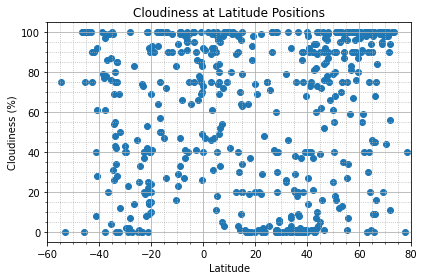

FileNotFoundError: [Errno 2] No such file or directory: 'Images/lat_clouds.png'

<Figure size 432x288 with 0 Axes>

In [20]:
x_values = cities_df["Lat"]
y_values = cities_df["Clouds"]

plt.scatter(x_values,y_values)
plt.title('Cloudiness at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim(-5, 105)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Images/lat_clouds.png")

## Latitude vs. Wind Speed Plot

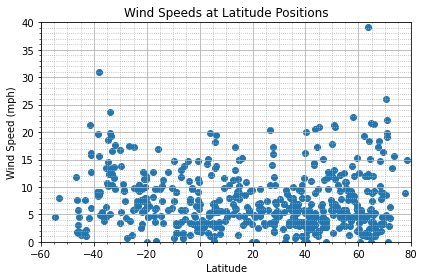

FileNotFoundError: [Errno 2] No such file or directory: 'Images/lat_wind.png'

<Figure size 432x288 with 0 Axes>

In [21]:
x_values = cities_df["Lat"]
y_values = cities_df["Wind Speed"]

plt.scatter(x_values,y_values)
plt.title('Wind Speeds at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylim(0, 40)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Images/lat_wind.png")

## Linear Regression

In [33]:
def linear_reg_plot(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_values.median(),y_values.median()),fontsize=15,color="red")
    plt.xlabel("Latitude")
    print(f"The r-squared is: {rvalue}")
    plt.show()

# create northern and southern hemisphere dataframes
northern_hemisphere = cities_df.loc[cities_df["Lat"]>0]
southern_hemisphere = cities_df.loc[cities_df["Lat"]<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.894935821330237


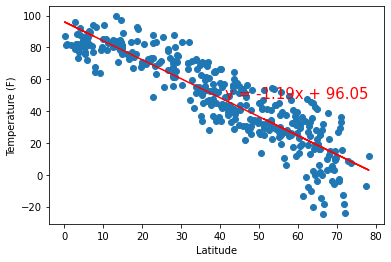

None


In [35]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Temperature"]
plt.ylabel("Temperature (F)")
print(linear_reg_plot(x_values,y_values))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7196435365040202


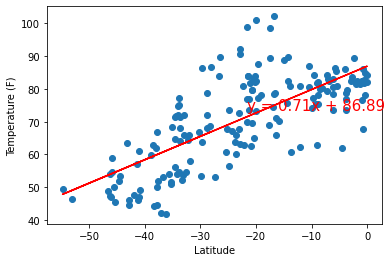

None


In [36]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Temperature"]
plt.ylabel("Temperature (F)")
print(linear_reg_plot(x_values,y_values))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.43266088042819123


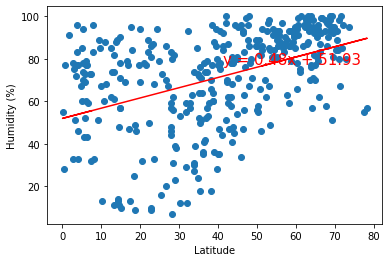

None


In [37]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Humidity"]
plt.ylabel("Humidity (%)")
print(linear_reg_plot(x_values,y_values))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.009719906689309261


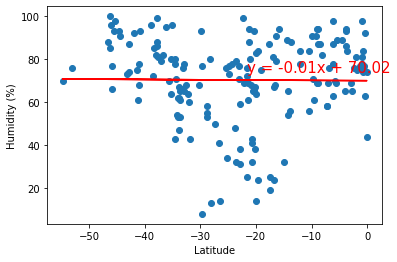

None


In [38]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Humidity"]
plt.ylabel("Humidity (%)")
print(linear_reg_plot(x_values,y_values))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.23124198978819416


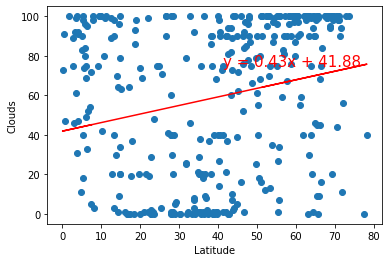

None


In [40]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Clouds"]
plt.ylabel("Clouds")
print(linear_reg_plot(x_values,y_values))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.1153288956912406


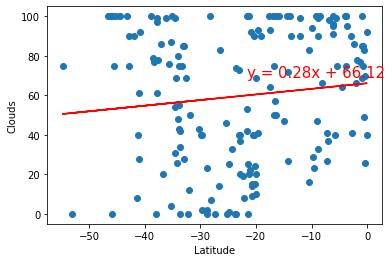

None


In [41]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Clouds"]
plt.ylabel("Clouds")
print(linear_reg_plot(x_values,y_values))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.11712712711078155


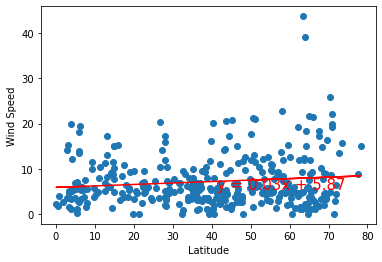

None


In [42]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Wind Speed"]
plt.ylabel("Wind Speed")
print(linear_reg_plot(x_values,y_values))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.2083908364124646


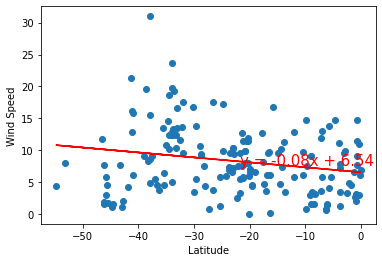

None


In [43]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Wind Speed"]
plt.ylabel("Wind Speed")
print(linear_reg_plot(x_values,y_values))